In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
sns.set()

In [3]:
data = pd.read_csv('cleaned data.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif


,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [44]:
data[['Mileage','EngineV','Year','Price']].corr()  # only gives us numerical data

,Mileage,EngineV,Year,Price
Mileage,1.000000,0.005710,-0.715361,-0.554100
EngineV,0.005710,1.000000,-0.020152,0.393040
Year,-0.715361,-0.020152,1.000000,0.570781
Price,-0.554100,0.393040,0.570781,1.000000


In [77]:
dataok = data.drop(['Price','Mileage'], axis  = 1)
dataok

,Brand,Body,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,3.5,Petrol,yes,1999,8.779557


In [70]:
x = sm.add_constant(x1)
regression = sm.OLS.from_formula('log_price~Year+EngineV',data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     5506.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:47:20   Log-Likelihood:                -2370.8
No. Observations:                3867   AIC:                             4748.
Df Residuals:                    3864   BIC:                             4766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -209.2875      2.364    -88.539      0.000    -213.922    -204.653
Year           0.1085      0.001     92.131      0.000       0.106       0.111
EngineV        0.3944      0.008     52.090      0.000       0.380       0.409
==============================================================================
Omnibus:                        6.926   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.007
Skew:                          -0.084   Prob(JB):                       0.0301
Kurtosis:                       3.123   Cond. No.                     6.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

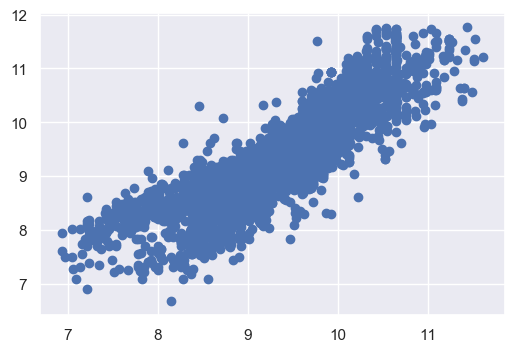

In [71]:
plt.scatter(regression.predict(),dataok.log_price)

count    3867.0
mean       -0.0
std         5.0
min       -22.0
25%        -3.0
50%         0.0
75%         3.0
max        18.0
Name: log_price, dtype: float64

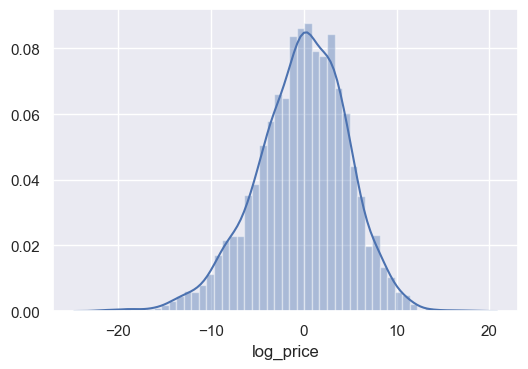

In [74]:
residual = ((dataok.log_price - regression.predict())/dataok.log_price)*100
sns.distplot(residual)
np.round(residual.describe())

In [79]:
datawithdummies = pd.get_dummies(dataok,drop_first = True)
datawithdummies.columns

Index(['EngineV', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [81]:
cols = ['log_price','EngineV', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [82]:
datawithdummies = datawithdummies[cols]

### Linear Model Regression

In [84]:
target = datawithdummies['log_price']
inputs = datawithdummies.drop('log_price', axis = 1)

#### Standardisation Input

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
scaled_data = scaler.transform(inputs)

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(scaled_data,target, test_size = 0.20, random_state = 365) 

#### Now create Regression

In [99]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_predicted = reg.predict(x_test)

(6, 13)

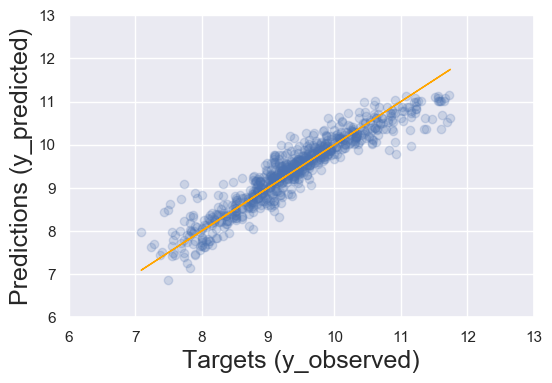

In [103]:
plt.scatter(y_test, y_predicted, alpha = 0.2)
yhat = 1*y_test
fig = plt.plot( y_test,yhat, lw = 1, c = 'orange',)

plt.xlabel('Targets (y_observed)', size = 18)
plt.ylabel('Predictions (y_predicted)' , size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

#### Finding the Weight Summary

In [97]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Feature'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Feature,Weights
0,EngineV,0.218898
1,Year,0.582100
2,Brand_BMW,0.021569
3,Brand_Mercedes-Benz,-0.003096
4,Brand_Mitsubishi,-0.133427
5,Brand_Renault,-0.203015
6,Brand_Toyota,-0.078838
7,Brand_Volkswagen,-0.108718
8,Body_hatch,-0.093025
9,Body_other,-0.081254


In [120]:
df_price  = pd.DataFrame(np.exp(y_predicted), columns = ['Predicted'])
df_price['Real price'] = np.exp(y_test.reset_index(drop = True))
df_price['Percentage'] = np.round((np.abs(df_price['Real price'] - df_price['Predicted'])/df_price['Real price'])*100,2)
df_price.describe()

,Predicted,Real price,Percentage
count,774.000000,774.000000,774.000000
mean,16551.692707,18165.817106,23.938682
std,13494.877654,19967.858908,26.503294
min,954.781437,1200.000000,0.020000
25%,6667.563564,6900.000000,8.040000
50%,12608.728082,11600.000000,16.780000
75%,21814.268983,20500.000000,30.457500
max,70309.259764,126000.000000,285.370000
